In [1]:
import practicalSPARQL
import pandas as pd
import ast
import matplotlib.pyplot as plt

In [2]:
root_q = 'queries'
root_d = 'results'

# read login data
login = pd.read_json('config_sparql.json')
ENDPOINT = login['endpoint'][0]
USERNAME = login['username'][0]
PASSWORD = login['password'][0]

# create sparql object
sparql = practicalSPARQL.practicalWrapper(ENDPOINT)
sparql.setCredentials(USERNAME, PASSWORD)

print("--- Querying ENDPOINT: {} ---".format(ENDPOINT))

--- Querying ENDPOINT: http://devmeta.sphaera.mpiwg-berlin.mpg.de/sparql ---


In [3]:
q = practicalSPARQL.stringify_SPARQL('elements_query_050824.sparql')    # select data from the ttl file as a dataframe
df = sparql.select_as_dataframe(q)

------ Endpoint not found - Sleeping for 5 seconds and retrying ------


In [4]:
df

,images,cluster_name,cks,book,bid,part_or_adaption,part_or_adaption_label,type_label,custom_identifier,place,year,flag
0,http://db.sphaera.mpiwg-berlin.mpg.de/containe...,SAC_SIL_01810,"CK_Superior Planets Lines and Motion, CK_Venus...",http://sphaera.mpiwg-berlin.mpg.de/id/item/744...,1923,http://sphaera.mpiwg-berlin.mpg.de/id/part/1ea...,Theoricae novae planetarum of Peurbach,"Original Part, Content",104,Venice,1482,nan
1,http://db.sphaera.mpiwg-berlin.mpg.de/containe...,SAC_SIL_02092,CK_Mercury Orbit,http://sphaera.mpiwg-berlin.mpg.de/id/item/744...,1923,http://sphaera.mpiwg-berlin.mpg.de/id/part/1ea...,Theoricae novae planetarum of Peurbach,"Original Part, Content",104,Venice,1482,nan
2,http://db.sphaera.mpiwg-berlin.mpg.de/containe...,SAC_SIL_01713,"CK_Superior Planets Orbit, CK_Venus Orbit",http://sphaera.mpiwg-berlin.mpg.de/id/item/744...,1923,http://sphaera.mpiwg-berlin.mpg.de/id/part/1ea...,Theoricae novae planetarum of Peurbach,"Content, Original Part",104,Venice,1482,nan
3,http://db.sphaera.mpiwg-berlin.mpg.de/containe...,SAC_SIL_00660,CK_Seven Climate Zones,http://sphaera.mpiwg-berlin.mpg.de/id/item/744...,1923,http://sphaera.mpiwg-berlin.mpg.de/id/part/c61...,Tractatus de sphaera,"Original Part, Content",100,Venice,1482,nan
4,http://db.sphaera.mpiwg-berlin.mpg.de/containe...,SAC_SIL_02799,"CK_Solar Eclipse, CK_Lunar Eclipse",http://sphaera.mpiwg-berlin.mpg.de/id/item/744...,1923,http://sphaera.mpiwg-berlin.mpg.de/id/part/c61...,Tractatus de sphaera,"Original Part, Content",100,Venice,1482,nan
...,...,...,...,...,...,...,...,...,...,...,...,...
20865,http://dev.sphaera.mpiwg-berlin.mpg.de/contain...,SAC_SIL_01714,CK_Colures,http://sphaera.mpiwg-berlin.mpg.de/id/item/fc8...,2270,http://sphaera.mpiwg-berlin.mpg.de/id/adaption...,French translation of the Sphere by Finé,"Content, Translation",805,Paris,1552,nan
20866,http://dev.sphaera.mpiwg-berlin.mpg.de/contain...,SAC_SIL_00464,CK_Meridian,http://sphaera.mpiwg-berlin.mpg.de/id/item/fc8...,2270,http://sphaera.mpiwg-berlin.mpg.de/id/adaption...,French translation of the Sphere by Finé,"Content, Translation",805,Paris,1552,nan
20867,http://dev.sphaera.mpiwg-berlin.mpg.de/contain...,SAC_SIL_01394,"CK_Structure of the Sublunar World, CK_Terraqu...",http://sphaera.mpiwg-berlin.mpg.de/id/item/fc8...,2270,http://sphaera.mpiwg-berlin.mpg.de/id/adaption...,French translation of the Sphere by Finé,"Translation, Content",805,Paris,1552,nan
20868,http://dev.sphaera.mpiwg-berlin.mpg.de/contain...,SAC_SIL_00250,CK_Qualities of the Aristotelian Elements,http://sphaera.mpiwg-berlin.mpg.de/id/item/fc8...,2270,http://sphaera.mpiwg-berlin.mpg.de/id/adaption...,French translation of the Sphere by Finé,"Translation, Content",805,Paris,1552,nan


In [4]:
q = practicalSPARQL.stringify_SPARQL('books_query.sparql')    # select data from the ttl file as a dataframe
books = sparql.select_as_dataframe(q)

C:\Users\nogas\AppData\Local\Temp\ipykernel_14300\953658752.py:32: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  unique_images_per_interval = filtered_df.groupby('interval')['images'].nunique().reset_index()
C:\Users\nogas\AppData\Local\Temp\ipykernel_14300\953658752.py:36: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  unique_books_per_interval = books.groupby('interval')['book'].nunique().reset_index()


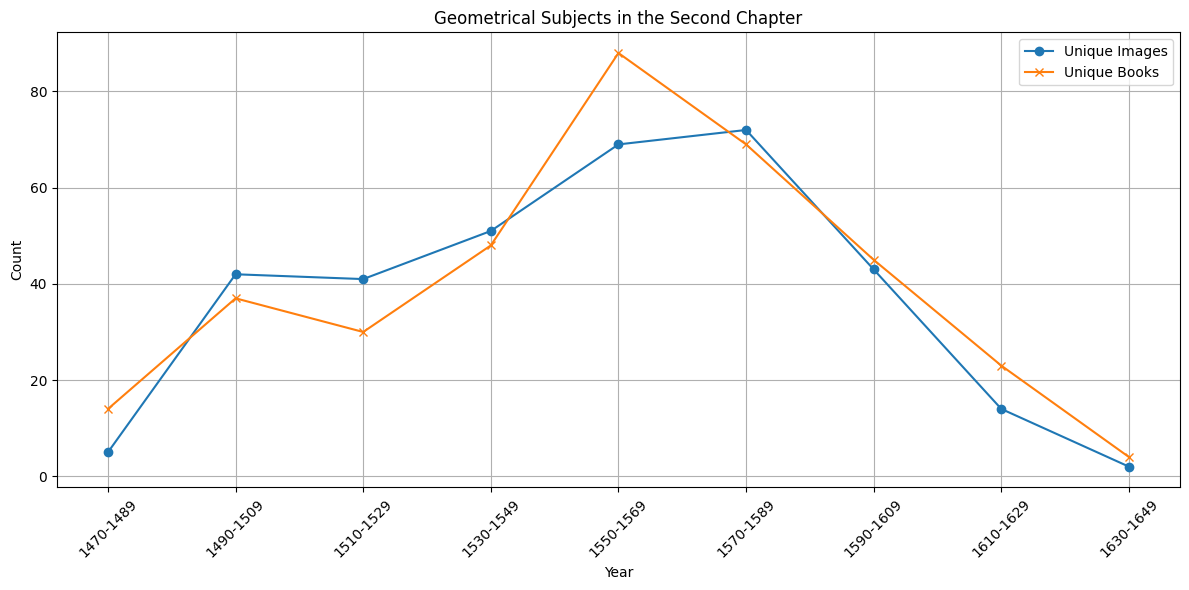

In [5]:
#plot the number of celestial circles images in comparison to the number of books

# Ensure the year column is of integer type
df['year'] = df['year'].astype(int)
books['year'] = books['year'].astype(int)

# Define bins and labels for year intervals
bins = [1470, 1490, 1510, 1530, 1550, 1570, 1590, 1610, 1630, 1650]
labels = [
    '1470-1489', '1490-1509', '1510-1529', '1530-1549',
    '1550-1569', '1570-1589', '1590-1609', '1610-1629', '1630-1649'
]

# Add interval column to the images DataFrame
df['interval'] = pd.cut(df['year'], bins=bins, labels=labels, right=False)

# Add interval column to the books DataFrame
books['interval'] = pd.cut(books['year'], bins=bins, labels=labels, right=False)

# Define keywords
keywords = [
     'CK_Distances between Small Circles', 'CK_Great and Small Circles Definition', 'CK_Relations between Arcs of the Zodiac and the Equinoctial', 'CK_Elevation of the Pole'
]

# Create a boolean mask for the keywords
mask = df['cks'].apply(lambda x: any(keyword in x for keyword in keywords))

# Filter the DataFrame based on the mask
filtered_df = df[mask]

# Count unique images per interval
unique_images_per_interval = filtered_df.groupby('interval')['images'].nunique().reset_index()
unique_images_per_interval.columns = ['interval', 'unique_images']

# Count unique books per interval
unique_books_per_interval = books.groupby('interval')['book'].nunique().reset_index()
unique_books_per_interval.columns = ['interval', 'unique_books']

# Merge the two DataFrames on 'interval'
merged_df = pd.merge(unique_images_per_interval, unique_books_per_interval, on='interval', how='outer')

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(merged_df['interval'], merged_df['unique_images'], label='Unique Images', marker='o')
plt.plot(merged_df['interval'], merged_df['unique_books'], label='Unique Books', marker='x')

plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Geometrical Subjects in the Second Chapter')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [6]:
# List of keywords to include
keywords = [
     'CK_Distances between Small Circles', 'CK_Great and Small Circles Definition', 'CK_Relations between Arcs of the Zodiac and the Equinoctial', 'CK_Elevation of the Pole'
]

# Combine keywords into a single pattern string
pattern = '|'.join([fr'\b{keyword}\b' for keyword in keywords])

# Filter the DataFrame
celestial_circles_geometrical_subjects = df[df['cks'].str.contains(pattern, case=False, na=False)]

celestial_circles_geometrical_subjects = celestial_circles_geometrical_subjects[['images', 'cluster_name', 'cks', 'bid', 'custom_identifier', 'year', 'place']]
celestial_circles_geometrical_subjects.rename(columns={'custom_identifier': 'part_id'}, inplace=True)

celestial_circles_geometrical_subjects

,images,cluster_name,cks,bid,part_id,year,place
22,http://db.sphaera.mpiwg-berlin.mpg.de/containe...,SAC_SIL_00849,CK_Elevation of the Pole,2201,100,1489,Leipzig
93,http://dev.sphaera.mpiwg-berlin.mpg.de/contain...,SAC_SIL_00102,CK_Relations between Arcs of the Zodiac and th...,1924,322,1488,Venice
117,http://db.sphaera.mpiwg-berlin.mpg.de/containe...,SAC_SIL_02310,CK_Relations between Arcs of the Zodiac and th...,1928,100,1485,Venice
269,http://db.sphaera.mpiwg-berlin.mpg.de/containe...,SAC_SIL_01641,"CK_Right and Oblique Sphere, CK_Elevation of t...",1926,322,1491,Venice
283,http://db.sphaera.mpiwg-berlin.mpg.de/containe...,SAC_SIL_00102,CK_Relations between Arcs of the Zodiac and th...,1926,322,1491,Venice
...,...,...,...,...,...,...,...
20701,http://dev.sphaera.mpiwg-berlin.mpg.de/contain...,SAC_SIL_01508,"CK_Elevation of the Pole, CK_Armillary Sphere",1967,939,1606,Lyon
20735,http://dev.sphaera.mpiwg-berlin.mpg.de/contain...,SAC_SIL_00512,"CK_Elevation of the Pole, CK_Centrality of Earth",2265,777,1521,Sine loco
20876,http://www.researchspace.org/ontology/ImageReg...,SAC_SIL_02146,"CK_Parallels, CK_Distances between Small Circles",2279,929,1599,London
20884,http://www.researchspace.org/ontology/ImageReg...,SAC_SIL_01676,CK_Elevation of the Pole,2279,929,1599,London


In [7]:
count_unique_images = celestial_circles_geometrical_subjects['images'].nunique()
print(f"Unique images count: {count_unique_images}")

count_unique_clusters = celestial_circles_geometrical_subjects['cluster_name'].nunique()
print(f"Unique clusters count: {count_unique_clusters}")

Unique images count: 339
Unique clusters count: 34


C:\Users\nogas\AppData\Local\Temp\ipykernel_14300\3120546708.py:36: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  unique_images_per_interval = filtered_df.groupby('interval')['images'].nunique().reset_index()
C:\Users\nogas\AppData\Local\Temp\ipykernel_14300\3120546708.py:36: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  unique_images_per_interval = filtered_df.groupby('interval')['images'].nunique().reset_index()
C:\Users\nogas\AppData\Local\Temp\ipykernel_14300\3120546708.py:36: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observe

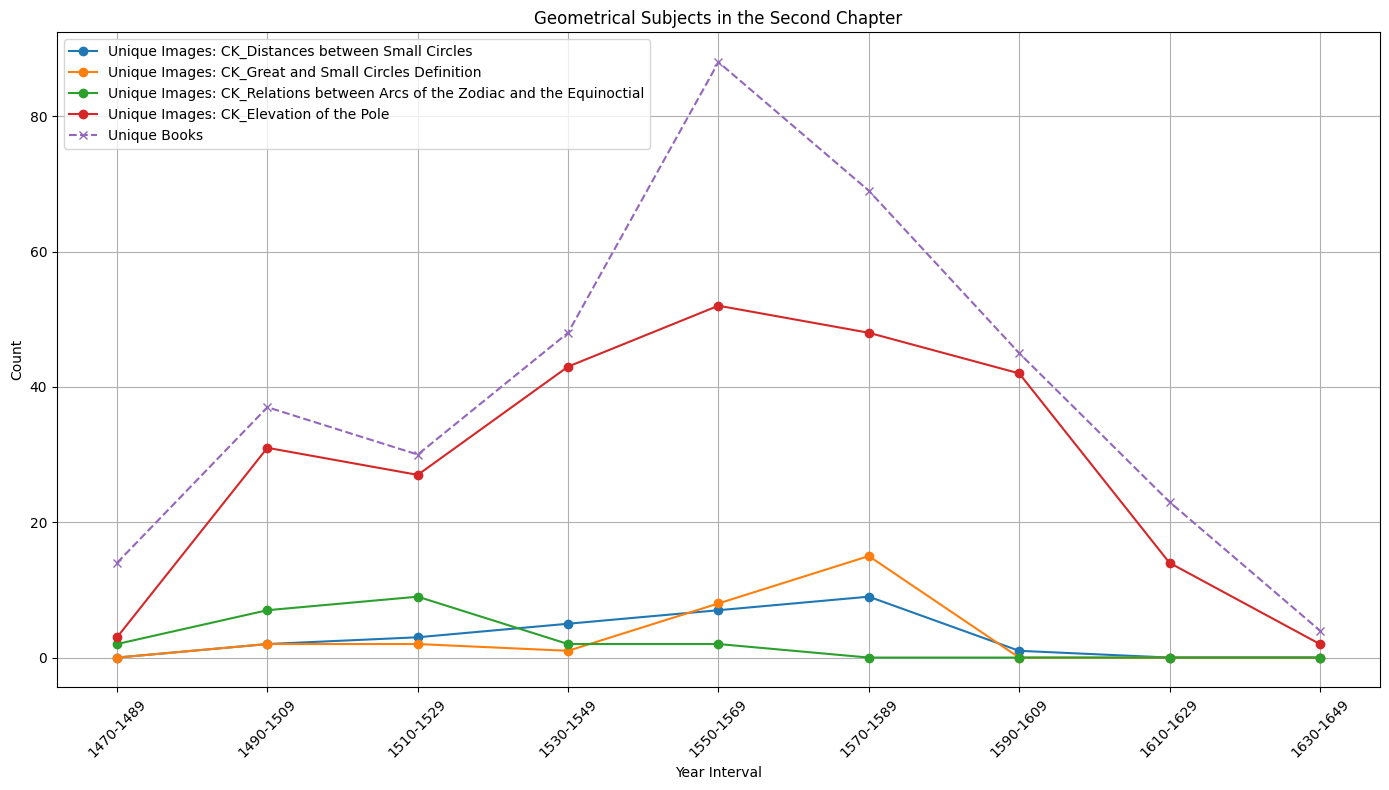

In [8]:
#comparison of different content keywords in celestial circles df
#including armillary sphere images: but only those included in these content groups! there is a big difference from all the armillary sphere content group that comes from other contexts as well.

# Ensure the year column is of integer type
celestial_circles_geometrical_subjects['year'] = celestial_circles_geometrical_subjects['year'].astype(int)
books['year'] = books['year'].astype(int)

# Define bins and labels for year intervals
bins = [1470, 1490, 1510, 1530, 1550, 1570, 1590, 1610, 1630, 1650]
labels = [
    '1470-1489', '1490-1509', '1510-1529', '1530-1549',
    '1550-1569', '1570-1589', '1590-1609', '1610-1629', '1630-1649'
]

# Add interval column to the images DataFrame
celestial_circles_geometrical_subjects['interval'] = pd.cut(celestial_circles_geometrical_subjects['year'], bins=bins, labels=labels, right=False)

# Add interval column to the books DataFrame
books['interval'] = pd.cut(books['year'], bins=bins, labels=labels, right=False)

# Define keywords
keywords = [
   'CK_Distances between Small Circles', 'CK_Great and Small Circles Definition', 'CK_Relations between Arcs of the Zodiac and the Equinoctial', 'CK_Elevation of the Pole'
]

# Prepare a DataFrame for each keyword
keyword_dfs = {}
for keyword in keywords:
    # Create a boolean mask for the keyword
    mask = celestial_circles_geometrical_subjects['cks'].apply(lambda x: keyword in x)
    
    # Filter the DataFrame based on the mask
    filtered_df = celestial_circles_geometrical_subjects[mask]
    
    # Count unique images per interval for this keyword
    unique_images_per_interval = filtered_df.groupby('interval')['images'].nunique().reset_index()
    unique_images_per_interval.columns = ['interval', f'unique_images_{keyword}']
    
    keyword_dfs[keyword] = unique_images_per_interval

# Merge all keyword DataFrames on 'interval'
merged_keyword_df = pd.merge(keyword_dfs[keywords[0]], keyword_dfs[keywords[1]], on='interval', how='outer')
for keyword in keywords[2:]:
    merged_keyword_df = pd.merge(merged_keyword_df, keyword_dfs[keyword], on='interval', how='outer')

# Count unique books per interval
unique_books_per_interval = books.groupby('interval')['book'].nunique().reset_index()
unique_books_per_interval.columns = ['interval', 'unique_books']

# Merge the keyword DataFrame with the books DataFrame
final_df = pd.merge(merged_keyword_df, unique_books_per_interval, on='interval', how='outer')

# Plot the results
plt.figure(figsize=(14, 8))

# Plot each keyword
for keyword in keywords:
    plt.plot(final_df['interval'], final_df[f'unique_images_{keyword}'], label=f'Unique Images: {keyword}', marker='o')

# Plot unique books
plt.plot(final_df['interval'], final_df['unique_books'], label='Unique Books', marker='x', linestyle='--')

plt.xlabel('Year Interval')
plt.ylabel('Count')
plt.title('Geometrical Subjects in the Second Chapter')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [9]:
#unique_values = celestial_circles_geometrical_subjects['cluster_name'].unique()
#unique_df = pd.DataFrame(unique_values, columns=['cluster_name'])
#unique_df.to_excel('celestial_circles_geometrical_subjects.xlsx', index=False, sheet_name='Sheet1')

In [10]:
# Path to the Excel file
excel_file_path = 'C:\\Users\\nogas\\Image_data\\celestial_circles_geometrical_subjects.xlsx'

# Load the Excel file into a DataFrame
excel_data = pd.read_excel(excel_file_path)

geomterical_subjects_visual = pd.merge(celestial_circles_geometrical_subjects, excel_data, on='cluster_name', how='left')

C:\Users\nogas\AppData\Local\Temp\ipykernel_14300\1164695376.py:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  return filtered_df.groupby('interval')['images'].nunique().reindex(labels, fill_value=0)
C:\Users\nogas\AppData\Local\Temp\ipykernel_14300\1164695376.py:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  return filtered_df.groupby('interval')['images'].nunique().reindex(labels, fill_value=0)
C:\Users\nogas\AppData\Local\Temp\ipykernel_14300\1164695376.py:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to r

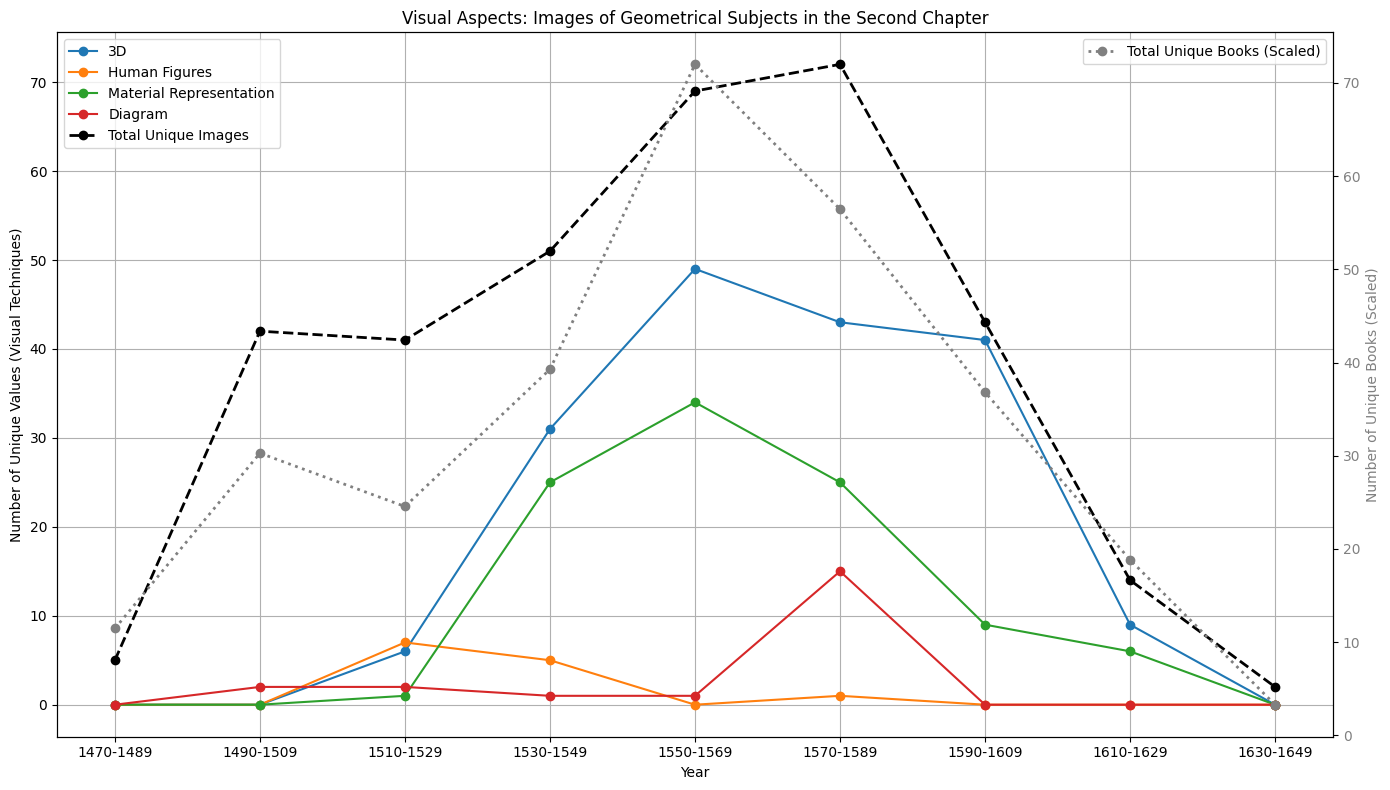

In [11]:
# Convert 'year' to int
geomterical_subjects_visual['year'] = geomterical_subjects_visual['year'].astype(int)
books['year'] = books['year'].astype(int)

# Create 20-year intervals
bins = [1470, 1490, 1510, 1530, 1550, 1570, 1590, 1610, 1630, 1650]
labels = ['1470-1489', '1490-1509', '1510-1529', '1530-1549', '1550-1569', '1570-1589', '1590-1609', '1610-1629', '1630-1649']

# Create a new column for the 20-year intervals
geomterical_subjects_visual['interval'] = pd.cut(geomterical_subjects_visual['year'], bins=bins, labels=labels, right=False)
books['interval'] = pd.cut(books['year'], bins=bins, labels=labels, right=False)

# Function to count unique images by column
def count_unique_images_by_column(column_name, value):
    filtered_df = geomterical_subjects_visual[geomterical_subjects_visual[column_name] == value]
    return filtered_df.groupby('interval')['images'].nunique().reindex(labels, fill_value=0)

# Collect data with updated column names
three_dimensions_effect = count_unique_images_by_column('3D', 'yes')
human_figures = count_unique_images_by_column('human figures', 'yes')
material_representation = count_unique_images_by_column('material representation', 'yes')
diagram = count_unique_images_by_column('diagram', 'yes')

# Combine the data for lines
side_by_side_data = pd.DataFrame({
    '3D': three_dimensions_effect,
    'Human Figures': human_figures,
    'Material Representation': material_representation,
    'Diagram': diagram,
})

# Calculate total unique books and images for each interval
total_unique_books_df = books.groupby('interval')['book'].nunique().reindex(labels, fill_value=0)
total_unique_images = geomterical_subjects_visual.groupby('interval')['images'].nunique().reindex(labels, fill_value=0)

# Determine a scaling factor for the secondary y-axis
scaling_factor = total_unique_images.max() / total_unique_books_df.max()

# Scale the book values for the secondary y-axis
scaled_books_df = total_unique_books_df * scaling_factor

# Plot lines with secondary y-axis for total unique books
fig, ax1 = plt.subplots(figsize=(14, 8))

# Plot lines for each category on primary y-axis
for column in side_by_side_data.columns:
    ax1.plot(labels, side_by_side_data[column], marker='o', linestyle='-', label=column)

# Create secondary y-axis
ax2 = ax1.twinx()

# Plot lines for total unique images and total unique books
ax1.plot(labels, total_unique_images, marker='o', linestyle='--', color='black', label='Total Unique Images', linewidth=2)
ax2.plot(labels, scaled_books_df, marker='o', linestyle=':', color='gray', label='Total Unique Books (Scaled)', linewidth=2)

# Formatting the plot
ax1.set_xlabel('Year')
ax1.set_ylabel('Number of Unique Values (Visual Techniques)')
ax2.set_ylabel('Number of Unique Books (Scaled)', color='gray')
ax1.set_title('Visual Aspects: Images of Geometrical Subjects in the Second Chapter')
ax1.tick_params(axis='y')
ax2.tick_params(axis='y', labelcolor='gray')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
ax1.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


C:\Users\nogas\AppData\Local\Temp\ipykernel_14300\1046883858.py:27: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  return filtered_df.groupby('interval')['images'].nunique().reindex(labels, fill_value=0)
C:\Users\nogas\AppData\Local\Temp\ipykernel_14300\1046883858.py:27: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  return filtered_df.groupby('interval')['images'].nunique().reindex(labels, fill_value=0)
C:\Users\nogas\AppData\Local\Temp\ipykernel_14300\1046883858.py:27: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to r

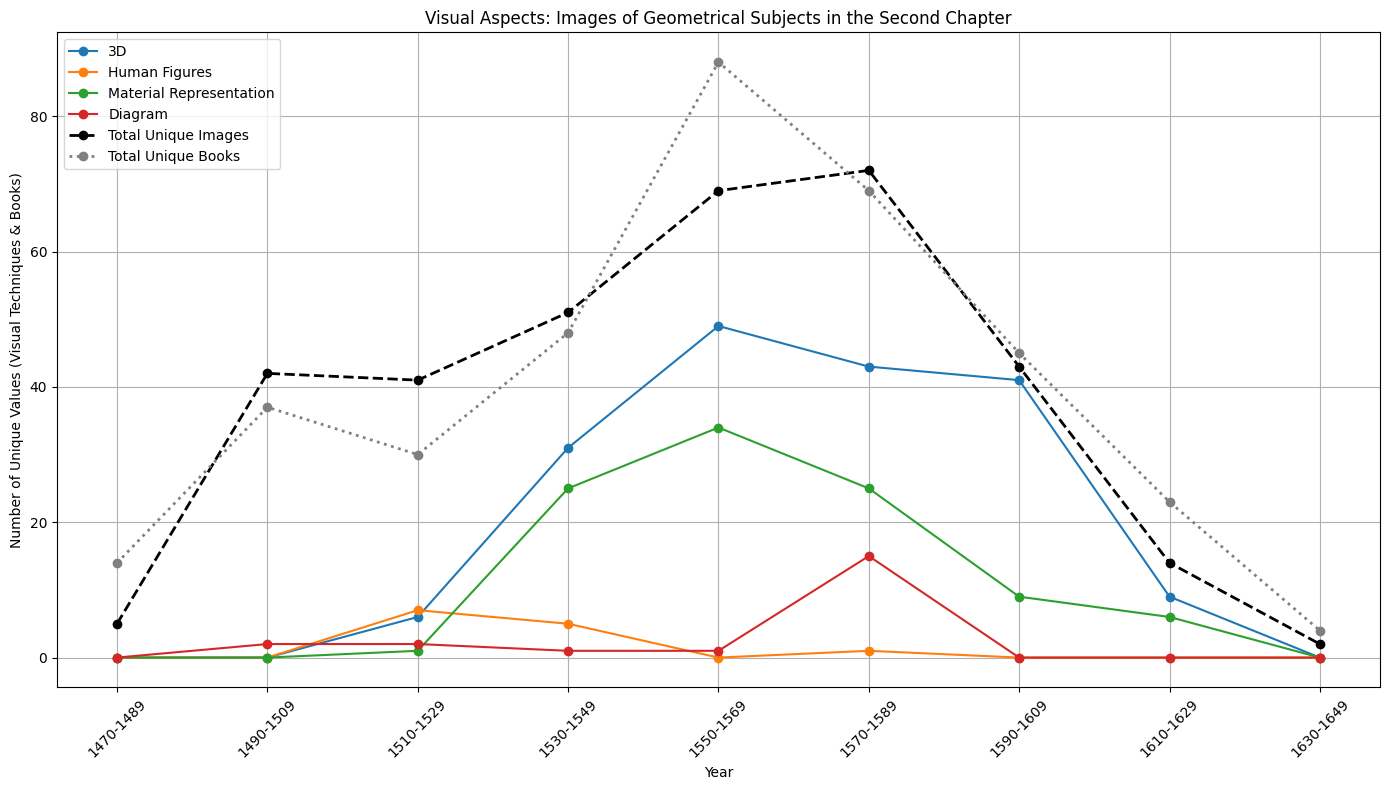

In [12]:
# Convert 'year' to int
geomterical_subjects_visual['year'] = geomterical_subjects_visual['year'].astype(int)
books['year'] = books['year'].astype(int)

# Create 20-year intervals
bins = [1470, 1490, 1510, 1530, 1550, 1570, 1590, 1610, 1630, 1650]
labels = ['1470-1489', '1490-1509', '1510-1529', '1530-1549', '1550-1569', 
          '1570-1589', '1590-1609', '1610-1629', '1630-1649']

# Create a new column for the 20-year intervals
geomterical_subjects_visual['interval'] = pd.cut(
    geomterical_subjects_visual['year'], 
    bins=bins, 
    labels=labels, 
    right=False
)
books['interval'] = pd.cut(
    books['year'], 
    bins=bins, 
    labels=labels, 
    right=False
)

# Function to count unique images by column
def count_unique_images_by_column(column_name, value):
    filtered_df = geomterical_subjects_visual[geomterical_subjects_visual[column_name] == value]
    return filtered_df.groupby('interval')['images'].nunique().reindex(labels, fill_value=0)

# Collect data with updated column names
three_dimensions_effect = count_unique_images_by_column('3D', 'yes')
human_figures = count_unique_images_by_column('human figures', 'yes')
material_representation = count_unique_images_by_column('material representation', 'yes')
diagram = count_unique_images_by_column('diagram', 'yes')

# Combine the data for lines
side_by_side_data = pd.DataFrame({
    '3D': three_dimensions_effect,
    'Human Figures': human_figures,
    'Material Representation': material_representation,
    'Diagram': diagram,
})

# Calculate total unique books for each interval
total_unique_books_df = books.groupby('interval')['book'].nunique().reindex(labels, fill_value=0)

# Calculate total unique images for each interval
total_unique_images = geomterical_subjects_visual.groupby('interval')['images'].nunique().reindex(labels, fill_value=0)

# Plot lines with a single y-axis for total unique books and images
fig, ax = plt.subplots(figsize=(14, 8))

# Plot lines for each category on primary y-axis
for column in side_by_side_data.columns:
    ax.plot(labels, side_by_side_data[column], marker='o', linestyle='-', label=column)

# Plot lines for total unique images and total unique books
ax.plot(labels, total_unique_images, marker='o', linestyle='--', color='black', label='Total Unique Images', linewidth=2)
ax.plot(labels, total_unique_books_df, marker='o', linestyle=':', color='gray', label='Total Unique Books', linewidth=2)

# Formatting the plot
ax.set_xlabel('Year')
ax.set_ylabel('Number of Unique Values (Visual Techniques & Books)')
ax.set_title('Visual Aspects: Images of Geometrical Subjects in the Second Chapter')
ax.tick_params(axis='y')
ax.legend(loc='upper left')
ax.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

C:\Users\nogas\AppData\Local\Temp\ipykernel_14300\2777707213.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_geomterical['interval'] = pd.cut(
C:\Users\nogas\AppData\Local\Temp\ipykernel_14300\2777707213.py:26: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  return filtered_df.groupby('interval')['images'].nunique().reindex(labels, fill_value=0)
C:\Users\nogas\AppData\Local\Temp\ipykernel_14300\2777707213.py:26: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=Fals

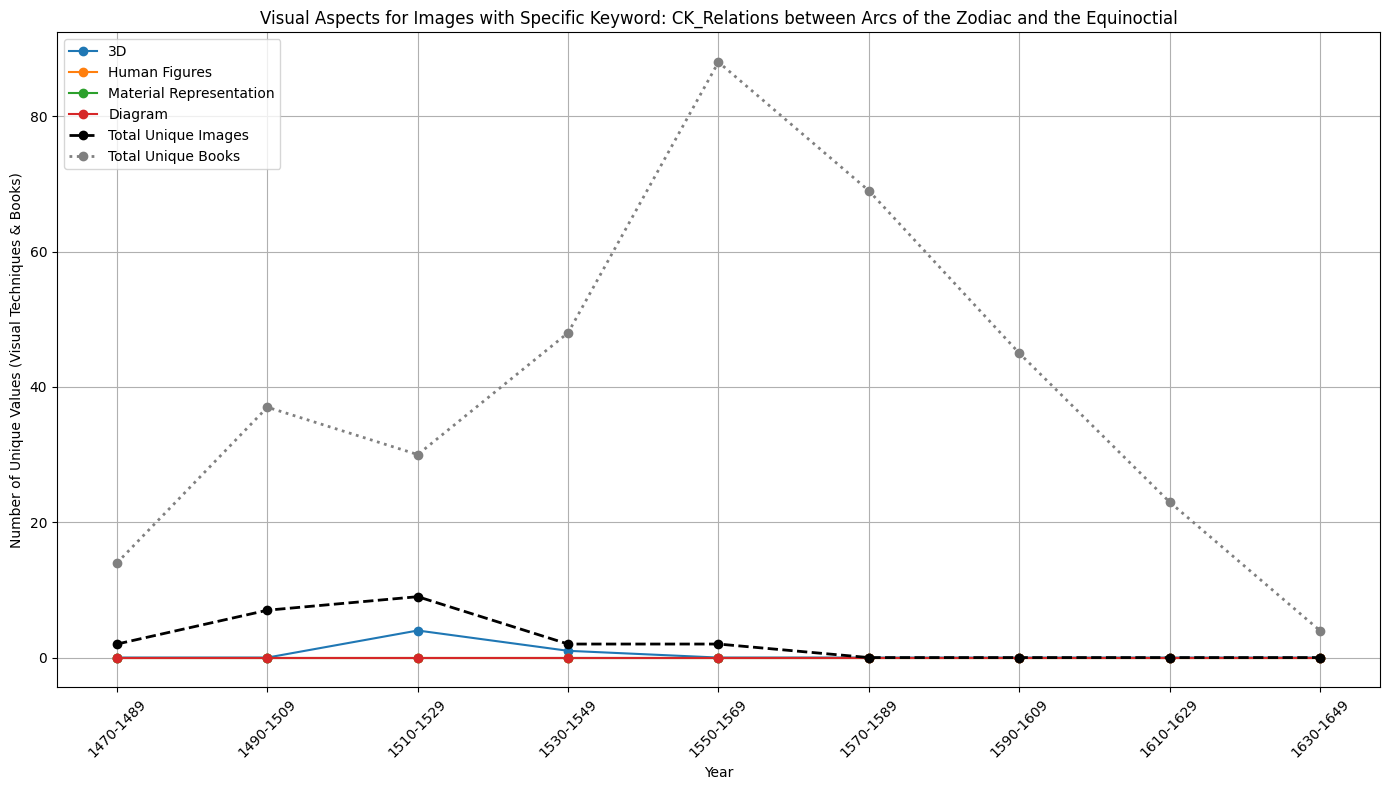

In [15]:

# Convert 'year' to int
geomterical_subjects_visual['year'] = geomterical_subjects_visual['year'].astype(int)
books['year'] = books['year'].astype(int)

# Create 20-year intervals
bins = [1470, 1490, 1510, 1530, 1550, 1570, 1590, 1610, 1630, 1650]
labels = ['1470-1489', '1490-1509', '1510-1529', '1530-1549', '1550-1569', 
          '1570-1589', '1590-1609', '1610-1629', '1630-1649']

# Filter for the specific keyword
filtered_geomterical = geomterical_subjects_visual[
    geomterical_subjects_visual['cks'].str.contains("CK_Relations between Arcs of the Zodiac and the Equinoctial", na=False)
]

# Create a new column for the 20-year intervals
filtered_geomterical['interval'] = pd.cut(
    filtered_geomterical['year'], 
    bins=bins, 
    labels=labels, 
    right=False
)

# Function to count unique images by column
def count_unique_images_by_column(column_name, value):
    filtered_df = filtered_geomterical[filtered_geomterical[column_name] == value]
    return filtered_df.groupby('interval')['images'].nunique().reindex(labels, fill_value=0)

# Collect data with updated column names
three_dimensions_effect = count_unique_images_by_column('3D', 'yes')
human_figures = count_unique_images_by_column('human figures', 'yes')
material_representation = count_unique_images_by_column('material representation', 'yes')
diagram = count_unique_images_by_column('diagram', 'yes')

# Combine the data for lines
side_by_side_data = pd.DataFrame({
    '3D': three_dimensions_effect,
    'Human Figures': human_figures,
    'Material Representation': material_representation,
    'Diagram': diagram,
})

# Calculate total unique books for each interval (from the original books DataFrame)
total_unique_books_df = books.groupby('interval')['book'].nunique().reindex(labels, fill_value=0)

# Calculate total unique images for the filtered interval
total_unique_images = filtered_geomterical.groupby('interval')['images'].nunique().reindex(labels, fill_value=0)

# Plot lines with a single y-axis for total unique books and images
fig, ax = plt.subplots(figsize=(14, 8))

# Plot lines for each category on primary y-axis
for column in side_by_side_data.columns:
    ax.plot(labels, side_by_side_data[column], marker='o', linestyle='-', label=column)

# Plot lines for total unique images and total unique books
ax.plot(labels, total_unique_images, marker='o', linestyle='--', color='black', label='Total Unique Images', linewidth=2)
ax.plot(labels, total_unique_books_df, marker='o', linestyle=':', color='gray', label='Total Unique Books', linewidth=2)

# Formatting the plot
ax.set_xlabel('Year')
ax.set_ylabel('Number of Unique Values (Visual Techniques & Books)')
ax.set_title('Visual Aspects for Images with Specific Keyword: CK_Relations between Arcs of the Zodiac and the Equinoctial')
ax.tick_params(axis='y')
ax.legend(loc='upper left')
ax.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [14]:
geomterical_subjects_visual

,images,cluster_name,cks,bid,part_id,year,place,interval,3D,human figures,material representation,diagram
0,http://db.sphaera.mpiwg-berlin.mpg.de/containe...,SAC_SIL_00849,CK_Elevation of the Pole,2201,100,1489,Leipzig,1470-1489,no,no,no,no
1,http://dev.sphaera.mpiwg-berlin.mpg.de/contain...,SAC_SIL_00102,CK_Relations between Arcs of the Zodiac and th...,1924,322,1488,Venice,1470-1489,no,no,no,no
2,http://db.sphaera.mpiwg-berlin.mpg.de/containe...,SAC_SIL_02310,CK_Relations between Arcs of the Zodiac and th...,1928,100,1485,Venice,1470-1489,no,no,no,no
3,http://db.sphaera.mpiwg-berlin.mpg.de/containe...,SAC_SIL_01641,"CK_Right and Oblique Sphere, CK_Elevation of t...",1926,322,1491,Venice,1490-1509,no,no,no,no
4,http://db.sphaera.mpiwg-berlin.mpg.de/containe...,SAC_SIL_00102,CK_Relations between Arcs of the Zodiac and th...,1926,322,1491,Venice,1490-1509,no,no,no,no
...,...,...,...,...,...,...,...,...,...,...,...,...
334,http://dev.sphaera.mpiwg-berlin.mpg.de/contain...,SAC_SIL_01508,"CK_Elevation of the Pole, CK_Armillary Sphere",1967,939,1606,Lyon,1590-1609,yes,no,yes,no
335,http://dev.sphaera.mpiwg-berlin.mpg.de/contain...,SAC_SIL_00512,"CK_Elevation of the Pole, CK_Centrality of Earth",2265,777,1521,Sine loco,1510-1529,yes,yes,no,no
336,http://www.researchspace.org/ontology/ImageReg...,SAC_SIL_02146,"CK_Parallels, CK_Distances between Small Circles",2279,929,1599,London,1590-1609,no,no,no,no
337,http://www.researchspace.org/ontology/ImageReg...,SAC_SIL_01676,CK_Elevation of the Pole,2279,929,1599,London,1590-1609,no,no,no,no
